# Interpretting Regression

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
sns.set_theme(font_scale=2,palette='colorblind')

## Multivariate Regression

We can also load data from Scikit learn.

This dataset includes 10 features measured on a given date and an measure of
diabetes disease progression measured one year later. The predictor we can train
with this data might be someting a doctor uses to calculate a patient's risk.

In [2]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
X_train,X_test, y_train,y_test = train_test_split(diabetes_X, diabetes_y ,
                         test_size=20,random_state=0)

In [3]:
X_train.shape

(422, 10)

In [4]:
regr_db = linear_model.LinearRegression()

In [5]:
regr_db.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False}

We have an empty estimator object at this point and then we can fit it as usual.

In [6]:
regr_db.fit(X_train,y_train)

LinearRegression()

This model predicts what lab measure a patient will have one year in the future
based on lab measures in a given day.  Since we see that this is not a very high
r2, we can say that this is not a perfect predictor, but a Doctor, who better
understands the score would have to help interpret the core.

In [7]:
regr_db.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 10,
 'coef_': array([ -32.30360126, -257.44019182,  513.32582416,  338.46035389,
        -766.84661714,  455.83564292,   92.5514199 ,  184.75080624,
         734.91009007,   82.72479583]),
 'rank_': 10,
 'singular_': array([1.95678408, 1.19959858, 1.08212757, 0.95268243, 0.79449825,
        0.76416914, 0.71267072, 0.64259342, 0.27343748, 0.0914504 ]),
 'intercept_': 152.391853606725}

We can look at the estimator again and see what it learned. It describes the model like a line:

$$ \hat{y} = mx+b$$

except in this case it's multivariate, so we can write it like:

$$ \hat{y} = \beta^Tx + \beta_0 $$

where $\beta$ is the `regr_db.coef_` and $\beta_0$ is `regr_db.intercept_` and that's a vector multiplication and $\hat{y}$ is `y_pred` and $y$ is `y_test`.  

In scalar form it can be written like

$$ \hat{y} = \sum_{k=0}^d(x_k*\beta_k) + \beta_0$$

where there are $d$ features, that is $d$= `len(X_test[k])` and $k$ indexed into it. For example in the below $k=0$

In [8]:
X_test[0]

array([ 0.01991321,  0.05068012,  0.10480869,  0.0700723 , -0.03596778,
       -0.0266789 , -0.02499266, -0.00259226,  0.00370906,  0.04034337])

We can compute the prediction manually:

In [9]:
sum(regr_db.coef_*X_test[0])  + regr_db.intercept_

234.91095893227003

and see that it matches

In [10]:
regr_db.predict(X_test[:2])

array([234.91095893, 246.81176987])

In [11]:
regr_db.score(X_test,y_test)

0.5195333332288746

We can also look at the residuals and see that they are fairly randomly spread out.

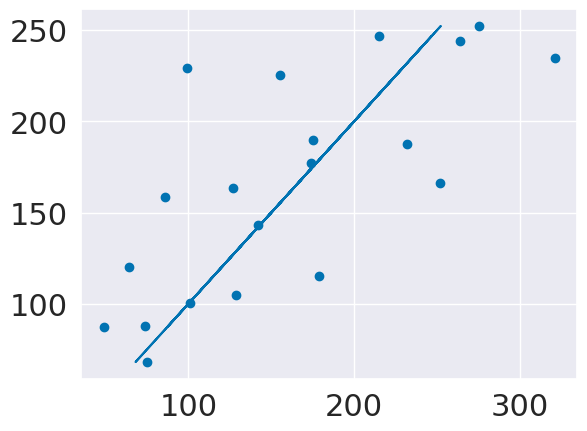

In [12]:
y_pred = regr_db.predict(X_test)
plt.scatter(y_test,y_pred)
plt.plot(y_pred,y_pred)

## Questions After Class

### Is there a way to calculate p value in addition to r^2?

The $R^2$ is a measure of the quality of the regression fit, but a p-value is not.  A p-value implies a broader experimental framework, so it is not included in this object. `sklearn` does have tools that will calculate a p-value when appropriate, but it not built into this estimator object. The [`scipy.stats.linregress`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) estimator does compute a p-value, and allows you to specify under which statistical test you want that p-value computed (two-sized, one-sided greater, or one-sided lesser).  

Broadly, p-values are very [frequently misinterpretted and misused](https://www.frontiersin.org/articles/10.3389/fphy.2016.00006/full).  Their use is not common in ML (because they're usually not the right thing) and being actively discouraged in other fields (eg psychology) in favor of more reliable and consistently well interpretted statistics.